In [1]:
import matplotlib.pyplot as plt
from transformers import get_linear_schedule_with_warmup, get_cosine_schedule_with_warmup, get_polynomial_decay_schedule_with_warmup
from torch.optim import AdamW
import torch

d:\marchine_learning\Projet\Deep_learning Project\OCR project\SCUT-CTW\trocr_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Les schedule avec Warmup pour transformers

1. Linear Schedule with Warmup

* Usage : le plus courant pour le fine-tuning standard de modèles pré-entraînés (BERT, TrOCR, etc.).
* Avantage : simple, stable, fonctionne très bien pour la plupart des tâches.
* Caractéristique : triangle inversé, warmup linéaire + décroissance linéaire.

2. Cosine Schedule with Warmup

* Usage : populaire pour les entraînements plus longs ou les modèles plus grands.
* Avantage : décroissance douce en cosinus, meilleure convergence vers la fin, moins de “choc” pour les poids.
* Caractéristique : warmup linéaire + descente en cosinus.

3. Polynomial Decay with Warmup

* Usage : utilisé quand on veut contrôler la vitesse de décroissance avec un power spécifique.
* Avantage : flexible, on peut avoir décroissance rapide au début ou lente, selon le power.
* Caractéristique : warmup linéaire + décroissance polynomial.

C:\Users\goudj\AppData\Local\Temp\ipykernel_17928\4114240045.py:39: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  scheduler_linear.step()
C:\Users\goudj\AppData\Local\Temp\ipykernel_17928\4114240045.py:42: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  scheduler_cosine.step()
C:\Users\goudj\AppData\Local\Tem

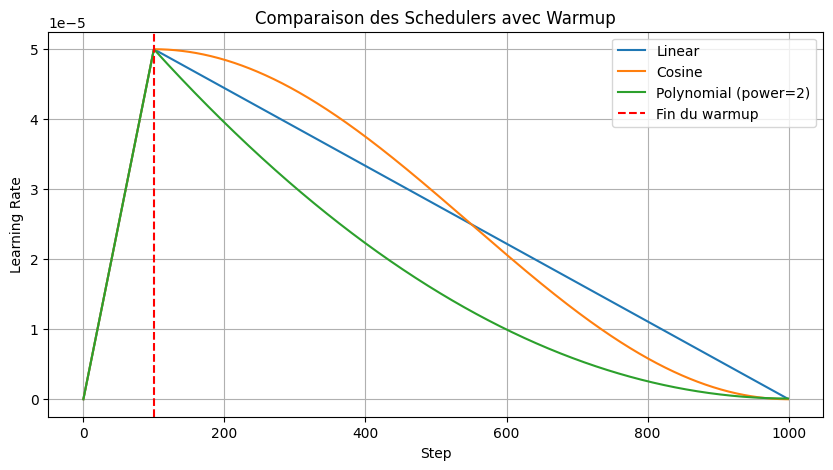

In [2]:
# --- Paramètres ---
num_training_steps = 1000
warmup_ratio = 0.1
learning_rate = 5e-5

# Optimizer fictif
model_params = [torch.nn.Parameter(torch.randn(2, 2, requires_grad=True))]
optimizer_linear = AdamW(model_params, lr=learning_rate)
optimizer_cosine = AdamW(model_params, lr=learning_rate)
optimizer_poly = AdamW(model_params, lr=learning_rate)

# --- Schedulers ---
scheduler_linear = get_linear_schedule_with_warmup(
    optimizer_linear,
    num_warmup_steps=int(warmup_ratio * num_training_steps),
    num_training_steps=num_training_steps
)

scheduler_cosine = get_cosine_schedule_with_warmup(
    optimizer_cosine,
    num_warmup_steps=int(warmup_ratio * num_training_steps),
    num_training_steps=num_training_steps
)

scheduler_poly = get_polynomial_decay_schedule_with_warmup(
    optimizer_poly,
    num_warmup_steps=int(warmup_ratio * num_training_steps),
    num_training_steps=num_training_steps,
    power=2.0  # exponent pour polynomial decay
)

# --- Collecte des LR ---
lrs_linear = []
lrs_cosine = []
lrs_poly = []

for step in range(num_training_steps):
    lrs_linear.append(scheduler_linear.get_last_lr()[0])
    scheduler_linear.step()
    
    lrs_cosine.append(scheduler_cosine.get_last_lr()[0])
    scheduler_cosine.step()
    
    lrs_poly.append(scheduler_poly.get_last_lr()[0])
    scheduler_poly.step()

# --- Tracé ---
plt.figure(figsize=(10,5))
plt.plot(lrs_linear, label='Linear')
plt.plot(lrs_cosine, label='Cosine')
plt.plot(lrs_poly, label='Polynomial (power=2)')
plt.axvline(x=int(warmup_ratio*num_training_steps), color='r', linestyle='--', label='Fin du warmup')
plt.xlabel('Step')
plt.ylabel('Learning Rate')
plt.title('Comparaison des Schedulers avec Warmup')
plt.legend()
plt.grid(True)
plt.show()


### À noter
Tous ces schedulers utilisent warmup(pharse de montée) linéaire pour stabiliser l’entraînement initial.

Les autres types comme OneCycleLR ou Cosine with hard restarts sont moins utilisés mais servent dans des cas particuliers (réveiller le LR, cycles courts, recherche de minima locaux).